# 线性回归的PyTorch实现

In [1]:
import torch
import torchvision
from torch import nn
from torch import optim
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']    #显示中文
plt.rcParams['axes.unicode_minus']=False        #用来正常显示负号

### 1.数据集

torch.Size([50, 1])
torch.Size([50, 1])


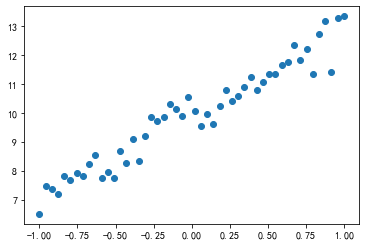

In [2]:
#构造数据集y = 3x + 10，后面加上torch.randn()函数制造噪声
x = torch.unsqueeze(torch.linspace(-1, 1, 50), dim = 1)
y = 3 * x + 10 + 0.5 * torch.randn(x.size())
print(x.size())
print(y.size())
plt.scatter(x,y)
plt.show()

### 2.模型定义

In [3]:
#定义线性回归模型
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.fc = nn.Linear(1, 1)
    
    def forward(self, x):
        out = self.fc(x)
        return out
    
model = LinearRegression()

In [4]:
#定义损失函数和优化函数
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 5e-3)

### 3.模型训练

In [5]:
num_epochs = 1000                  #遍历整个训练集的次数
for epoch in range(num_epochs):
    #forward
    out = model(x)                 #前向传播
    loss = criterion(out, y)       #计算损失函数
    #backward
    optimizer.zero_grad()          #梯度归零
    loss.backward()                #反向传播
    optimizer.step()               #更新参数
    
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'.format(epoch+1, num_epochs, loss.detach().numpy()))

Epoch[20/1000], loss: 82.273201
Epoch[40/1000], loss: 55.363750
Epoch[60/1000], loss: 37.328217
Epoch[80/1000], loss: 25.233475
Epoch[100/1000], loss: 17.116770
Epoch[120/1000], loss: 11.664607
Epoch[140/1000], loss: 7.997840
Epoch[160/1000], loss: 5.527968
Epoch[180/1000], loss: 3.860983
Epoch[200/1000], loss: 2.733017
Epoch[220/1000], loss: 1.967301
Epoch[240/1000], loss: 1.445365
Epoch[260/1000], loss: 1.087768
Epoch[280/1000], loss: 0.841209
Epoch[300/1000], loss: 0.669875
Epoch[320/1000], loss: 0.549700
Epoch[340/1000], loss: 0.464469
Epoch[360/1000], loss: 0.403242
Epoch[380/1000], loss: 0.358620
Epoch[400/1000], loss: 0.325581
Epoch[420/1000], loss: 0.300704
Epoch[440/1000], loss: 0.281647
Epoch[460/1000], loss: 0.266799
Epoch[480/1000], loss: 0.255038
Epoch[500/1000], loss: 0.245580
Epoch[520/1000], loss: 0.237867
Epoch[540/1000], loss: 0.231503
Epoch[560/1000], loss: 0.226198
Epoch[580/1000], loss: 0.221736
Epoch[600/1000], loss: 0.217958
Epoch[620/1000], loss: 0.214739
Epoch[

### 3.模型测试

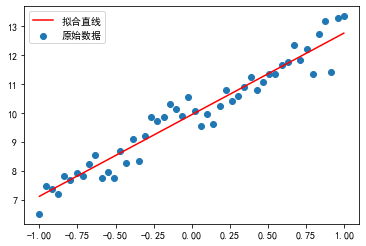

In [6]:
model.eval()              #进入预测评估模式
y_hat = model(x)
plt.scatter(x.numpy(), y.numpy(), label = '原始数据')
plt.plot(x.numpy(), y_hat.detach().numpy(), c= 'r', label = '拟合直线')   #.detach()用于停止对张量的梯度跟踪
#显示图例
plt.legend()
plt.show()

In [7]:
#查看拟合直线的训练参数
list(model.named_parameters())

[('fc.weight',
  Parameter containing:
  tensor([[2.8202]], requires_grad=True)),
 ('fc.bias',
  Parameter containing:
  tensor([9.9472], requires_grad=True))]